In [1]:
import keras
import os, shutil

# 원본 데이터셋을 압축 해제한 디렉터리 경로
original_bart_simpson = './simpsons_data/bart_simpson'
original_homer_simpson = './simpsons_data/homer_simpson'
original_lisa_simpson = './simpsons_data/lisa_simpson'
original_marge_simpson = './simpsons_data/marge_simpson'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = './simpsons_small'

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# 심슨 라벨 리스트
simpson_labels = os.listdir(train_dir)

Using TensorFlow backend.


In [2]:
from keras import layers
from keras import models

model = models.Sequential()
## conv1
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(150, 150, 1), padding = 'SAME'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding = 'SAME'))
model.add(layers.MaxPooling2D((2, 2)))

## conv2
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding = 'SAME'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding = 'SAME'))
model.add(layers.MaxPooling2D((2, 2)))

## conv3
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding = 'SAME'))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding = 'SAME'))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding = 'SAME'))
model.add(layers.MaxPooling2D((2, 2)))

## conv4
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding = 'SAME'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding = 'SAME'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding = 'SAME'))
model.add(layers.MaxPooling2D((2, 2)))

# ## conv5
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding = 'SAME'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding = 'SAME'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding = 'SAME'))
model.add(layers.MaxPooling2D((2, 2)))

# 출력층
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 64)      640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 150, 150, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 256)       295168    
__________

In [4]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=15e-5),
              metrics=['acc'])

In [5]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
# 모든 이미지를 1/255로 스케일을 조정합니다
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        color_mode = 'grayscale', #컬러 이미지를 흑백 이미지로 변환
        batch_size=60,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        color_mode = 'grayscale', #컬러 이미지를 흑백 이미지로 변환
        batch_size=50,
        class_mode='categorical')


Found 3600 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


from keras.preprocessing import image

img1 = train_generator[0][0][0]
print(type(img1))
img1_tensor = image.img_to_array(img1)
img1_tensor /= 255.
plt.plot(img1_tensor)
plt.show()


In [6]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
import time
from keras.callbacks import EarlyStopping, ModelCheckpoint
startTime = time.time()

callbacks_list = [ModelCheckpoint(filepath='simpson_lr15e5_rmsprop.h5', monitor='val_loss', save_best_only=True)] # val_loss기준 가장 낮은 수치의 결과를 저장
# EarlyStopping(monitor='val_loss', patience=5),

history = model.fit_generator(
      train_generator,
      steps_per_epoch=60,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=16,
      callbacks = callbacks_list) # 체크포인트 활성화

print("Computation time:{0:3f} sec".format(time.time()-startTime))

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
60/60 [==============================] - 76s 1s/step - loss: 1.5437 - acc: 0.2736 - val_loss: 1.3863 - val_acc: 0.2500
Epoch 2/50
60/60 [==============================] - 66s 1s/step - loss: 1.3933 - acc: 0.2750 - val_loss: 1.3838 - val_acc: 0.3125
Epoch 3/50
60/60 [==============================] - 67s 1s/step - loss: 1.3892 - acc: 0.2419 - val_loss: 1.3860 - val_acc: 0.2500
Epoch 4/50
60/60 [==============================] - 68s 1s/step - loss: 1.3859 - acc: 0.2967 - val_loss: 1.3758 - val_acc: 0.2675
Epoch 5/50
60/60 [==============================] - 68s 1s/step - loss: 1.4141 - acc: 0.3383 - val_loss: 1.2845 - val_acc: 0.4537
Epoch 6/50
60/60 [==============================] - 69s 1s/step - loss: 1.2501 - acc: 0.4378 - val_loss: 1.3804 - val_acc: 0.2588
Epoch 7/50
60/60 [==============================] - 69s 1s/step - loss: 1.1808 - acc: 0.4806 - val_loss: 1.0798 - val_acc: 0.5738
Epoch 8/50
60/60 [========================

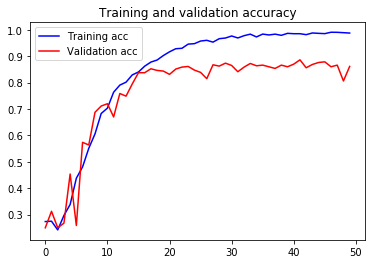

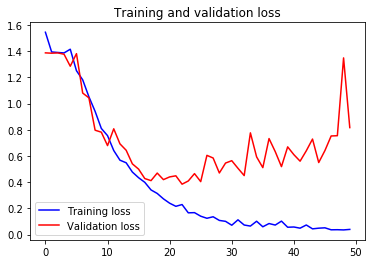

In [7]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [8]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        color_mode = 'grayscale',
        batch_size=60,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=10)
print('test acc:', test_acc)

Found 600 images belonging to 4 classes.
test acc: 0.8833333194255829


(1, 150, 150, 1)


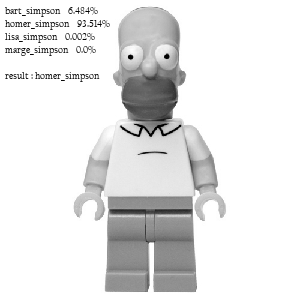

In [9]:
# 이미지 파일 불러오기
from keras.preprocessing import image
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt

# 이미지 불러오기 / 전처리
img_name = 'sim007.jpg'
img = image.load_img('test_image/%s'%img_name, target_size=(150,150))
img = img.convert('L')
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor,axis=0)
img_tensor /= 255.
print(img_tensor.shape)

a=[]
per = model.predict(img_tensor)
label_index = model.predict_classes(img_tensor)[0]
for i in range(4):
    a.append(simpson_labels[i]+"    "+str(round(per[0][i]*100,3))+"%")

a.append('\nresult : '+simpson_labels[model.predict_classes(img_tensor)[0]])
id='\n'.join(a)

from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 
im_sample = Image.new("RGB", (110,90),(255,255,255))
draw = ImageDraw.Draw(im_sample)
# font = ImageFont.truetype(<font-file>, <font-size>)

font = ImageFont.truetype("CALIFR.TTF", 10)
# draw.text((x, y),"Sample Text",(r,g,b))
draw.text((5, 5),id,(0,0,0),font=font)

img = image.load_img('test_image/%s'%img_name, target_size=(300,300))
img = img.convert('L')
img.paste(im_sample)
img.save('sample-out.jpg')
img